In [106]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [107]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [108]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [109]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [110]:
# Target Search Term
targets = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes' ]
# targets = ['@BBC']

In [111]:
# Lists to hold sentiments
sentiments = []

In [112]:

oldest_tweet = None

# Loop through targets
for target in targets:
    
    counter = 1
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(7):
    
        # Grab 100 tweets
        public_tweets = api.search(target, max_id = oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            text = tweet['text']
            outlet = target[1:]

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

             # Add sentiments for each tweet into a list
            sentiments.append({"Date": tweet["created_at"], 
                               "Tweet Polarity": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                              "News Outlet": outlet,
                              "Tweets Ago": counter,
                              "Text": text})

             # Add to counter 
            counter = counter + 1

#             print(target)

In [113]:
# Construct DataFrame
sentiment_raw = pd.DataFrame(sentiments)
sentiment_df = sentiment_raw[['Tweet Polarity', 'Negative', 'Neutral', 'Positive', 'News Outlet', 'Tweets Ago', 'Date']]
sentiment_grouped = sentiment_df.set_index(sentiment_df['News Outlet'])
sentiment_grouped.head()


,Tweet Polarity,Negative,Neutral,Positive,News Outlet,Tweets Ago,Date
News Outlet,,,,,,,
BBC,0.0000,1.000,0.000,0.000,BBC,1,Wed Aug 01 22:40:55 +0000 2018
BBC,-0.6597,0.714,0.286,0.000,BBC,2,Wed Aug 01 22:40:54 +0000 2018
BBC,0.2062,0.651,0.160,0.188,BBC,3,Wed Aug 01 22:40:33 +0000 2018
BBC,0.1179,0.718,0.116,0.166,BBC,4,Wed Aug 01 22:40:26 +0000 2018
BBC,0.2382,0.919,0.000,0.081,BBC,5,Wed Aug 01 22:40:19 +0000 2018


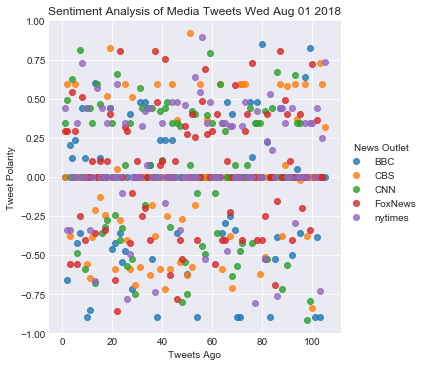

In [114]:
# Plot Scatter using Seaborn

date = sentiment_df['Date'][0][0:10] + sentiment_df['Date'][0][25:]

sns.set_style('darkgrid')
fig1 = sns.lmplot(x='Tweets Ago',y='Tweet Polarity', data=sentiment_grouped, fit_reg=False, hue='News Outlet')
plt.title(f'Sentiment Analysis of Media Tweets {date}')
plt.ylim(-1,1)

fig1.savefig('Output/scatter_sent.png')

In [115]:
# Create DataFrame for barplot
sentiment_avg = sentiment_df.groupby('News Outlet').mean().reset_index()
sentiment_avg

,News Outlet,Tweet Polarity,Negative,Neutral,Positive,Tweets Ago
0,BBC,-0.076353,0.877343,0.079181,0.043467,53.0
1,CBS,-0.015549,0.866276,0.068467,0.065248,53.0
2,CNN,0.029053,0.832071,0.081293,0.086646,50.0
3,FoxNews,0.026612,0.803788,0.099644,0.096596,52.5
4,nytimes,0.092914,0.889048,0.039238,0.071695,53.0


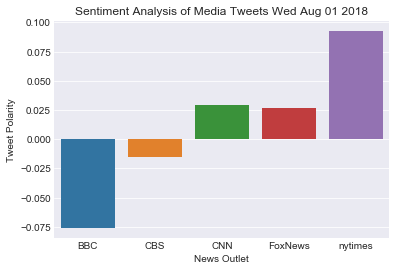

In [116]:
# Plot Bar Graph using Seaborn
fig2 = sns.barplot(x='News Outlet',y='Tweet Polarity', data=sentiment_avg,)
plt.title(f'Sentiment Analysis of Media Tweets {date}')

plt.savefig('Output/bar_sent.png')

In [117]:
# Export data to csv
sentiment_raw.to_csv('Output/data.csv')
sentiment_avg.to_csv('Output/data_avg.csv')

In [118]:
sentiment_raw

,Date,Negative,Neutral,News Outlet,Positive,Text,Tweet Polarity,Tweets Ago
0,Wed Aug 01 22:40:55 +0000 2018,1.000,0.000,BBC,0.000,RT @RussiaConnects: For accurate news from Syr...,0.0000,1
1,Wed Aug 01 22:40:54 +0000 2018,0.714,0.286,BBC,0.000,@BBC This brought a tear to the eye of a grump...,-0.6597,2
2,Wed Aug 01 22:40:33 +0000 2018,0.651,0.160,BBC,0.188,@BBC I'm pretty sure that I do and won't apolo...,0.2062,3
3,Wed Aug 01 22:40:26 +0000 2018,0.718,0.116,BBC,0.166,"RT @MadeinGB2013: Dear Peter , how much is you...",0.1179,4
4,Wed Aug 01 22:40:19 +0000 2018,0.919,0.000,BBC,0.081,"RT @Zarkwan: So, YouTube channels pulled at in...",0.2382,5
5,Wed Aug 01 22:40:09 +0000 2018,0.872,0.128,BBC,0.000,RT @favm: @realDonaldTrump @cnn @bbc @msnbc @S...,-0.4215,6
6,Wed Aug 01 22:40:08 +0000 2018,0.651,0.233,BBC,0.116,@AMcNeillPeel @davidblackfin @BBC Looks like @...,-0.3612,7
7,Wed Aug 01 22:40:03 +0000 2018,0.888,0.000,BBC,0.112,RT @CBoyle2000: @WingsScotland At last someone...,0.4404,8
8,Wed Aug 01 22:39:43 +0000 2018,0.718,0.116,BBC,0.166,"RT @MadeinGB2013: Dear Peter , how much is you...",0.1179,9
9,Wed Aug 01 22:39:42 +0000 2018,0.617,0.383,BBC,0.000,RT @yorkspride: #Newsnight\n 👇\n'We no longer ...,-0.8957,10
